# Image Processing and Filtering

# Basic Image Manipulation Techniques

### Introduction
Image processing is the practice of applying mathematical operations to images to enhance them or extract meaningful information.
Filtering is a common technique used to modify or enhance an image, such as smoothing, sharpening, or detecting edges.
In this notebook, we will:
1. Introduce image processing and filtering.
2. Implement image filtering using OpenCV (`cv2.filter2D`) and scikit-learn.
3. Explore common image processing techniques like thresholding and edge detection.

### Prerequisites
- Python 3.x
- OpenCV (`cv2`) library for image processing
- NumPy for numerical operations
- Matplotlib for visualization


**Install necessary libraries using the following command:**

pip install opencv-python-headless matplotlib numpy

**Step 1: Import Libraries and Load Synthetic Image**

In [2]:
# !pip install opencv-python-headless matplotlib numpy

Matplotlib is building the font cache; this may take a moment.


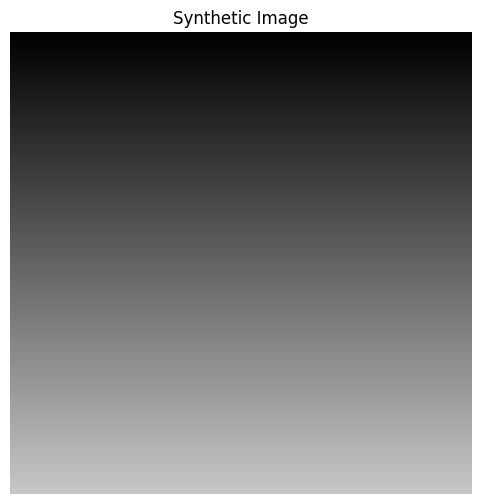

In [3]:
try:
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
except ModuleNotFoundError as e:
    print("A required module is missing. Install the necessary dependencies using the following:")
    print("pip install opencv-python-headless matplotlib numpy")
    raise e

# Generate a synthetic image (grayscale gradient)
image = np.zeros((200, 200, 3), dtype=np.uint8)
for i in range(200):
    image[i, :] = (i, i, i)  # Gradient from black to white

# Convert BGR to RGB for proper display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the synthetic image
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Synthetic Image")
plt.axis("off")
plt.show()

**Step 2: Applying Filters Using OpenCV**

Filters modify pixel values in an image based on their neighbors. Common filters include:
- **Smoothing**: Reduces noise by averaging pixel values.
- **Sharpening**: Enhances edges in the image.

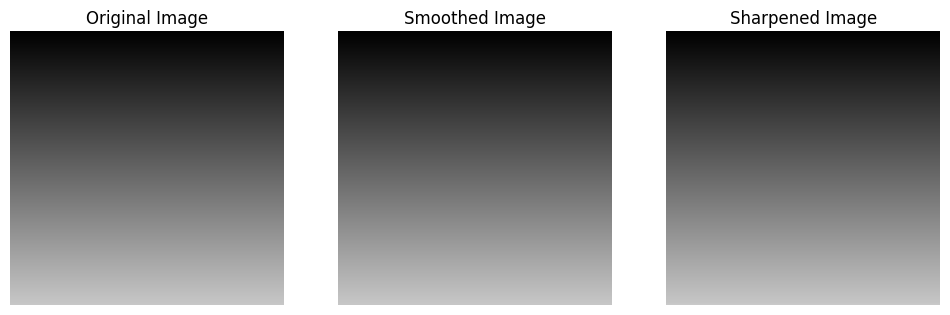

In [4]:
# Define filters
kernel_smoothing = np.ones((5, 5), np.float32) / 25  # Averaging filter
kernel_sharpening = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])

# Apply filters
smoothed_image = cv2.filter2D(image, -1, kernel_smoothing)
sharpened_image = cv2.filter2D(image, -1, kernel_sharpening)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB))
plt.title("Smoothed Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image")
plt.axis("off")

plt.show()

**Step 3: Image Thresholding**

Thresholding is used to segment an image by converting it into a binary format based on pixel intensity.
- **Global Thresholding**: A single threshold value is applied.
- **Adaptive Thresholding**: Threshold value is calculated for smaller regions of the image.

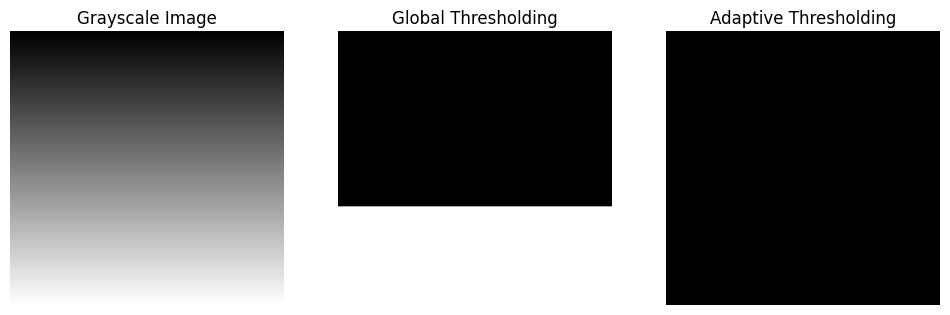

In [5]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply global thresholding
_, binary_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Display thresholded images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(binary_thresh, cmap="gray")
plt.title("Global Thresholding")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(adaptive_thresh, cmap="gray")
plt.title("Adaptive Thresholding")
plt.axis("off")

plt.show()

**Step 4: Edge Detection**

Edge detection identifies sharp changes in intensity, highlighting boundaries in the image.
Common methods include:
- **Sobel Operator**: Calculates derivatives in x and y directions.
- **Canny Edge Detection**: A multi-step algorithm for detecting edges.

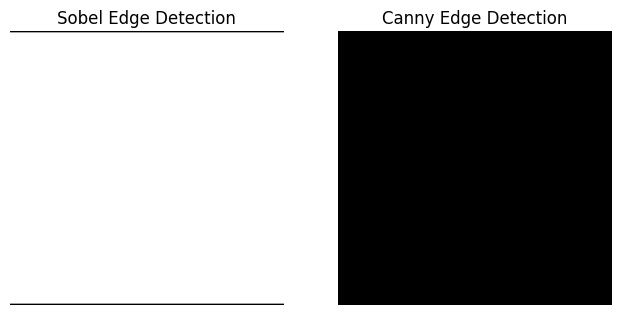

In [6]:
# Apply Sobel filters
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Apply Canny edge detection
canny_edges = cv2.Canny(gray_image, 100, 200)

# Display edge-detected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(sobel_combined, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(canny_edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")

plt.show()

### Summary
In this notebook, we covered:
- Basic image manipulation using OpenCV.
- Applying filters like smoothing and sharpening.
- Thresholding for image segmentation.
- Edge detection techniques like Sobel and Canny.
Continue exploring more advanced image processing techniques, such as morphological operations and contour detection!